# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [82]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)

In [83]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [84]:
# sampling
Y_generative = np.zeros(1000)
Y_generative[:500] = np.ones(500)
np.random.shuffle(Y_generative)
X_1_generative = np.random.multivariate_normal(m1, sigma, Y_generative[Y_generative==1].size)
X_2_generative = np.random.multivariate_normal(m2, sigma, Y_generative[Y_generative==0].size)


X_generative = np.zeros((1000, 2))
X_generative[Y_generative==1] = X_1_generative
X_generative[Y_generative==0] = X_2_generative




Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


### _Solution_:
 $$P(Y=1|x) = \frac{P(x|Y=1)P(Y=1)}{P(x|Y=0)P(Y=0)+P(x|Y=1)P(Y=1)}$$
 $$= \frac{P(x|Y=1)\pi}{P(x|Y=0)(1-\pi)+P(x|Y=1)\pi}$$
 $$= \frac{1}{\frac{P(x|Y=0)}{P(x|Y=1)}\frac{1-\pi}{\pi} + 1}$$
 $$= \frac{1}{1+e^{\log(\frac{P(x|Y=0)}{P(x|Y=1)}\frac{1-\pi}{\pi})}}$$

Now we simplify the probabilities:
 

 $$\frac{P(x|Y=0)}{P(x|Y=1)} = \frac{
\frac{1}{(2\pi)^{d/2} \, |\Sigma|^{1/2}} \, \exp ( -\frac{1}{2} (x - \mu_2)^T\Sigma^{-1} (x - \mu_2) )
}{\frac{1}{(2\pi)^{d/2} \, |\Sigma|^{1/2}} \, \exp ( -\frac{1}{2} (x - \mu_1)^T\Sigma^{-1} (x - \mu_1) )
}$$
$$= \frac{\exp ( -\frac{1}{2} (x - \mu_2)^T\Sigma^{-1} (x - \mu_2) )}{\exp ( -\frac{1}{2} (x - \mu_1)^T\Sigma^{-1} (x - \mu_1) )}

$$
$$= \exp \frac{1}{2} ( - (x - \mu_2)^T\Sigma^{-1} (x - \mu_2) + (x - \mu_1)^T\Sigma^{-1} (x - \mu_1) )$$
$$= \exp ( x^T\Sigma^{-1} (\mu_2 - \mu_1) +\frac{1}{2} (\mu_1^T\Sigma^{-1} \mu_1 - \mu_2^T\Sigma^{-1} \mu_2) )$$

And by equating to logistic regression and substituting obtain:
$$\frac{1}{1+e^{-\beta_0 - \beta x}} = \frac{1}{1+e^{\log(\frac{P(x|Y=0)}{P(x|Y=1)}\frac{1-\pi}{\pi})}}$$
$$-\beta_0 - \beta x = \log(\frac{P(x|Y=0)}{P(x|Y=1)}\frac{1-\pi}{\pi})$$
$$-\beta_0 - \beta x = x^T\Sigma^{-1} (\mu_2 - \mu_1) +\frac{1}{2} (\mu_1^T\Sigma^{-1} \mu_1 - \mu_2^T\Sigma^{-1} \mu_2) +\log(\frac{1-\pi}{\pi})$$
therefore:
$$ \beta = \Sigma^{-1} (\mu_1-\mu_2)$$
$$\beta_0 = \frac{1}{2} (\mu_2^T\Sigma^{-1} \mu_2 - \mu_1^T\Sigma^{-1} \mu_1) + \log(\frac{\pi}{1-\pi}) $$



#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.
### _Solution_: in the first bullet

In [85]:
invsigma = np.linalg.inv(sigma)
b0 = np.log(1) + m2.T @ invsigma @ m2 * .5 - m1.T @ invsigma @ m1 * .5
b0

-2.0

In [86]:
# computing b# theoretical params

b = invsigma @ (m1 - m2)
b

array([2., 2.])

In [87]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.0571235]), array([[2.18573817, 2.14512939]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [88]:
# sampling
distribution = np.random.binomial(1, .5, 1000)
X_discriminative = np.zeros((1000, 2))
X_discriminative[distribution==0] = np.random.multivariate_normal(m1, sigma, distribution[distribution==0].size)
X_discriminative[distribution==1] = np.random.multivariate_normal(m2, sigma, distribution[distribution==1].size)


Y_discriminative = np.apply_along_axis(lambda x: np.random.binomial(1, 1/(1+np.exp(2 - np.array([2,2]).T @ x))), 1, X_discriminative)


In [89]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_discriminative, Y_discriminative)

LogisticRegression(penalty=None)

In [90]:
mod_b.intercept_, mod_b.coef_

(array([-2.06533368]), array([[2.03432196, 2.0522426 ]]))

#### Second bullet point

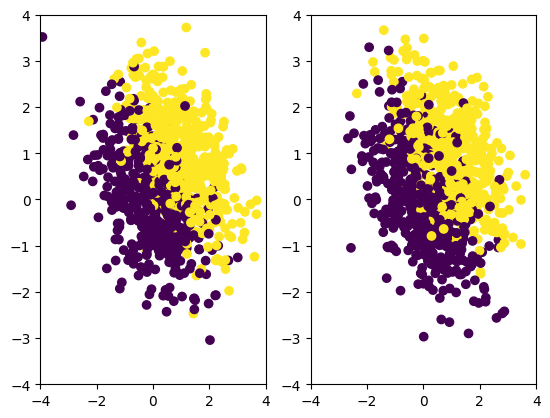

In [91]:
plt.subplot(1, 2, 1)
plt.scatter(x=X_generative[:, 0], y=X_generative[:, 1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(x=X_discriminative[:, 0], y=X_discriminative[:, 1], c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?
##### _Solution_:
There is no visible difference in the plots of $P_{X,Y}$ distribution.
What those two methods differ in is what we control directly, in the generative approach we control $\pi$ while in discriminative approach we directly control $P(Y=1|x)$

### c) 

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

#### _Solution_:
$$p(y=1|x) = \frac{\pi p(x|y=1)}{\pi p(x|y=1) + (1-\pi) p(x|y=-1)}.$$

$$(\pi p(x|y=1) + (1-\pi) p(x|y=-1)) p(y=1|x) = \pi p(x|y=1)$$
$$p(x|y=-1) = \frac{\pi p(x|y=1) - p(y=1|x)\pi p(x|y=1)}{p(y=1|x)(1-\pi)}$$
$$= \frac{\pi p(x|y=1)( 1 - p(y=1|x) )}{p(y=1|x)(1-\pi)}$$
$$= \frac{\pi p(x|y=1)}{1-\pi} \frac{1-p(y=1|x)}{p(y=1|x)}$$
$$= \frac{\pi p(x|y=1)}{1-\pi} (\frac{1}{p(y=1|x)} -1)$$

$p(y=1|x)$ corresponds to logistic model and $p(x|y=1)$ corresponds to exponential distribution so:
$$p(x|y=-1) = \frac{\pi e^{-x}}{1-\pi} e^{(-\beta_0 - \beta_1 x)}$$
$$= \frac{\pi e^{-\beta_0}}{1-\pi} e^{-x(1+\beta_1)}$$
$$= C_{\beta_0, \pi} e^{-x(1+\beta_1)}$$

Where
$$C_{\beta_0, \pi} = \frac{\pi e^{-\beta_0}}{1-\pi}$$
must equal $1+\beta_1$ to give a probability distribution function ( integral over domain equal to 1 )


Q2: Once we fix $\pi$,  $\beta_0$ is constrained by $C_{\beta_0, \pi} = 1 + \beta_1$, as such it is always uniquely determined
Q3: Since we do not know $\pi$ we can not uniquely determine $\beta_0$ as we obtain a more or less linear (linear with regard to $-\log(\beta_0)$ equation with 2 unknown values
Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

...

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

setting $\beta_1 = 1$ and $\pi = 1/3$ we substitute those values into equation for $C_{\beta_0, \pi}$
$$C_{\beta_0, \pi} = 1 + \beta_1 = 2 = \frac{\pi e^{-\beta_0}}{1-\pi}$$
$$ = \frac{  e^{-\beta_0}}{2}$$
$$4 = e^{-\beta_0}$$
$$\beta_0 = -\log(4) ~= -1.386$$



In [92]:
import numpy as np
np.log(4)

1.3862943611198906

In [93]:
# sampling
beta1 = 1
n1 = 1000
n2 = 2000

x1 = np.random.exponential(1, size=n1)
x2 = np.random.exponential(1/(beta1 + 1), size=n2)
X = np.concatenate([x1, x2]).reshape(-1, 1)
y = np.concatenate([np.ones(n1), np.zeros(n2)])

In [94]:
# a model
model = LogisticRegression(penalty=None)
model.fit(X, y)
model.intercept_, model.coef_

(array([-1.36010744]), array([[0.97473931]]))

In [95]:
beta1 = 1
pi_c = n1/(n1 + n2)
beta0 = -np.log((1+beta1) * (1 - pi_c)/pi_c) # for any values of b1 and n1, n2
beta0

-1.3862943611198908

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [96]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [97]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [98]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [99]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [100]:
# excess risk
# ...

In [101]:
# simulations with fixed sample size

In [102]:
# simulations for various sample sizes

In [103]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)